In [1]:
import numpy as nump
import pandas as pd
import os
import matplotlib.pyplot as pyt
import seaborn as sb
import plotly as py
import plotly.graph_objs as go

In [2]:
customerdata = pd.read_csv('online_shoppers_intention.csv')

customerdata.shape

(12330, 18)

In [3]:
customerdata.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [4]:
customerdata.head(1000)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,10.0,0,0.0,39,1152.500000,0.011966,0.017802,0.0,0.0,Mar,3,2,1,3,Returning_Visitor,False,False
996,10,164.5,1,3.0,61,2292.679762,0.000000,0.009552,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
997,0,0.0,0,0.0,9,329.000000,0.022222,0.044444,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
998,0,0.0,0,0.0,8,111.666667,0.000000,0.025000,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False


In [5]:
customerdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [6]:
customerdata.isnull().sum().sum()

0

Text(0, 0.5, 'OVERALL REVENUE')

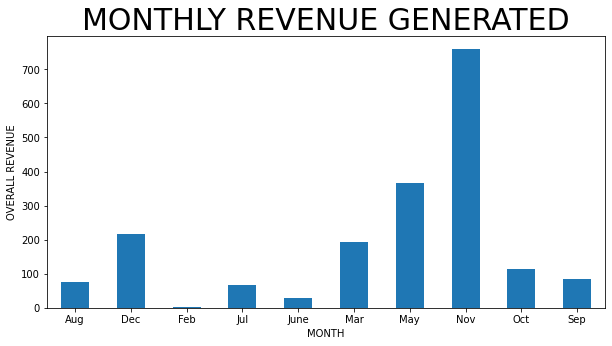

In [7]:
monthly_revenue = customerdata.groupby(['Month'])[['Revenue']].agg('sum')
graph = monthly_revenue.unstack().plot(kind='bar', figsize=(10,5))
pyt.xticks(nump.arange(10), sorted(customerdata.Month.unique()), rotation=0)
graph.set_xlabel('MONTH')
pyt.title('MONTHLY REVENUE GENERATED', fontsize = 30)
graph.set_ylabel('OVERALL REVENUE')

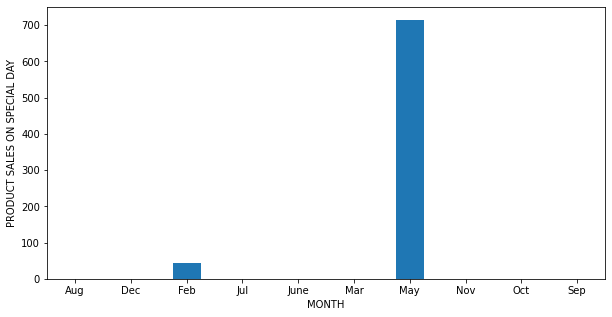

In [8]:
specialDay_data = customerdata.groupby(['Month'])[['SpecialDay']].agg('sum')
graph = specialDay_data.unstack().plot(kind='bar', figsize=(10,5))
pyt.xticks(nump.arange(10), sorted(customerdata.Month.unique()), rotation=0)
graph.set_xlabel('MONTH')
graph.set_ylabel('PRODUCT SALES ON SPECIAL DAY')
pyt.show()

27009.85943
0.0
(-0.001, 1.0]          13
(1.0, 2.0]              0
(2.0, 4.0]              0
(4.0, 10.0]             6
(10.0, 23.0]           13
(23.0, 50.0]           17
(50.0, 110.0]          40
(110.0, 243.0]         89
(243.0, 532.0]        285
(532.0, 1167.0]       530
(1167.0, 2558.0]      503
(2558.0, 5608.0]      295
(5608.0, 12291.0]     101
(12291.0, 26940.0]     15
(26940.0, 59049.0]      1
Name: ProductRelated_Duration, dtype: int64


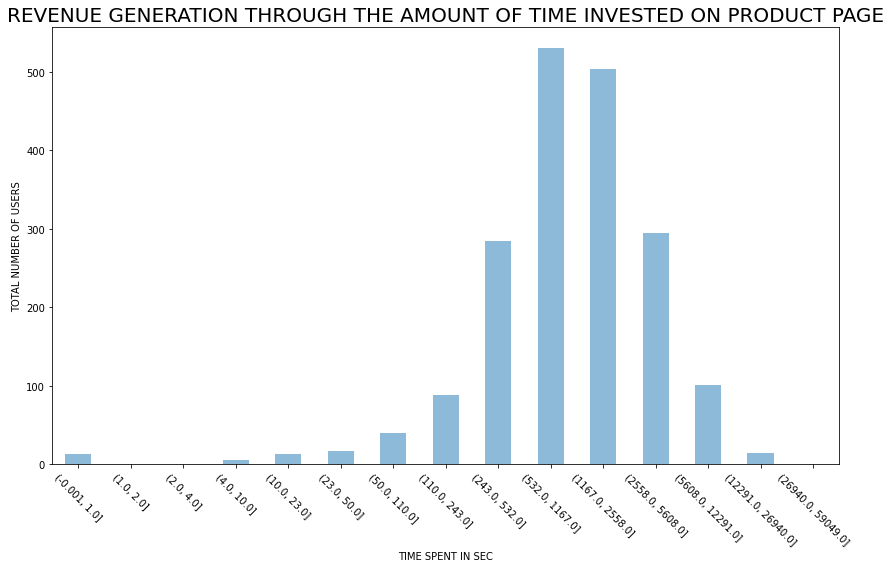

In [9]:
product_bought = customerdata[customerdata['Revenue'] == True]
print(product_bought['ProductRelated_Duration'].max())
print(product_bought['ProductRelated_Duration'].min())

log_spaced_data = nump.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = nump.append([0],log_spaced_data)
d = pd.cut(product_bought['ProductRelated_Duration'],
           log_spaced_data, right=True,include_lowest=True)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('TOTAL NUMBER OF USERS')
a.set_xlabel('TIME SPENT IN SEC')
pyt.title('REVENUE GENERATION THROUGH THE AMOUNT OF TIME INVESTED ON PRODUCT PAGE', fontsize = 20)
pyt.tight_layout()

1767.6666670000002
0.0
(0, 1]              0
(1, 2]              4
(2, 4]              6
(4, 10]            41
(10, 23]           54
(23, 50]          100
(50, 110]         107
(110, 243]        113
(243, 532]         87
(532, 1167]        45
(1167, 2558]        8
(2558, 5608]        0
(5608, 12291]       0
(12291, 26940]      0
(26940, 59049]      0
Name: Informational_Duration, dtype: int64


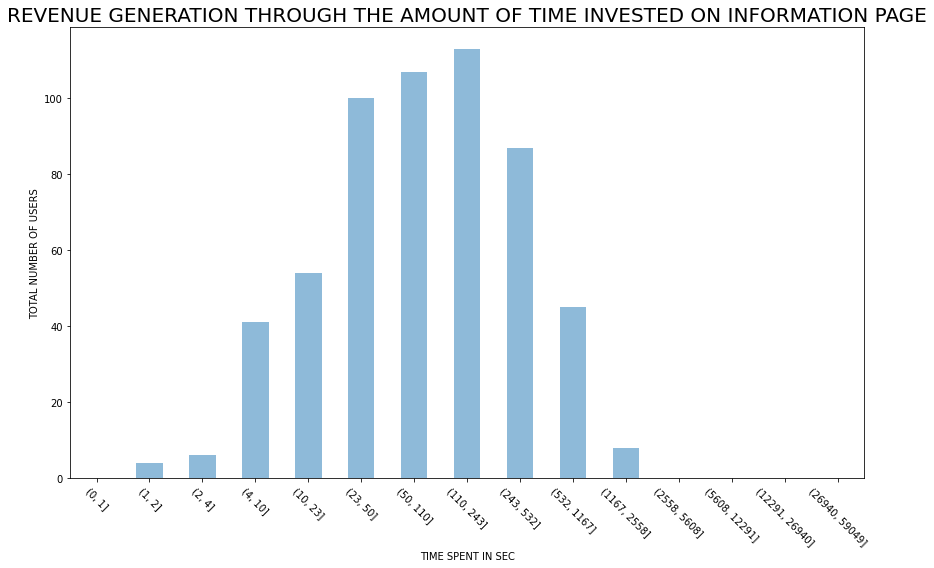

In [10]:
product_bought = customerdata[customerdata['Revenue'] == True]
print(product_bought['Informational_Duration'].max())
print(product_bought['Informational_Duration'].min())


log_spaced_data = nump.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = nump.append([0],log_spaced_data)
d = pd.cut(product_bought['Informational_Duration'],
           log_spaced_data, right=True,include_lowest=False)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('TOTAL NUMBER OF USERS')
a.set_xlabel('TIME SPENT IN SEC')
pyt.title('REVENUE GENERATION THROUGH THE AMOUNT OF TIME INVESTED ON INFORMATION PAGE', fontsize = 20)
pyt.tight_layout()

2086.75
0.0
(0, 1]              0
(1, 2]              2
(2, 4]             15
(4, 10]            45
(10, 23]           97
(23, 50]          233
(50, 110]         364
(110, 243]        329
(243, 532]        198
(532, 1167]        63
(1167, 2558]       14
(2558, 5608]        0
(5608, 12291]       0
(12291, 26940]      0
(26940, 59049]      0
Name: Administrative_Duration, dtype: int64


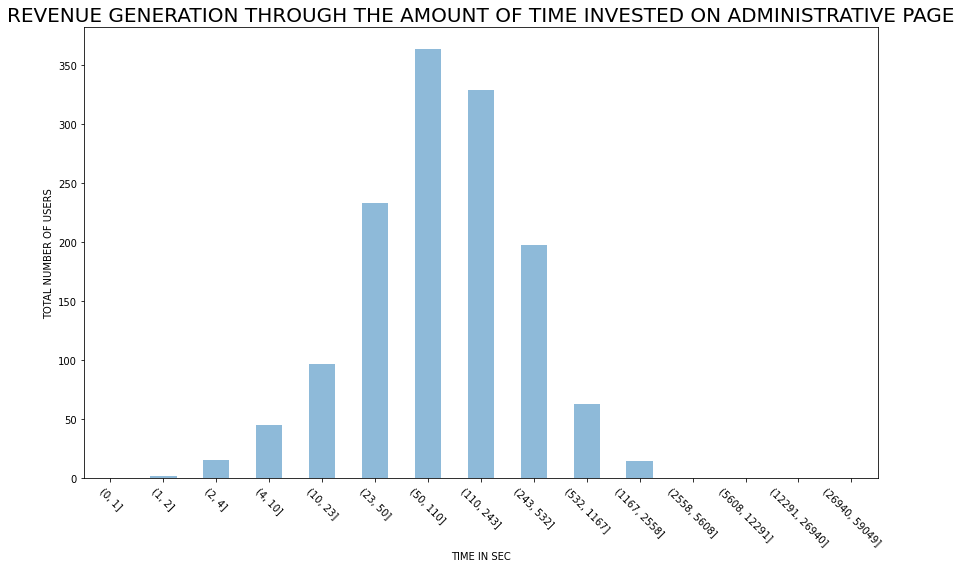

In [11]:
product_bought = customerdata[customerdata['Revenue'] == True]
print(product_bought['Administrative_Duration'].max())
print(product_bought['Administrative_Duration'].min())


log_spaced_data = nump.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = nump.append([0],log_spaced_data)
d = pd.cut(product_bought['Administrative_Duration'],
           log_spaced_data, right=True,include_lowest=False)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('TOTAL NUMBER OF USERS')
a.set_xlabel('TIME IN SEC')
pyt.title('REVENUE GENERATION THROUGH THE AMOUNT OF TIME INVESTED ON ADMINISTRATIVE PAGE', fontsize = 20)
pyt.tight_layout()

In [12]:
mark1 = ["purchase not done","purchase done"]
mark2 = ['no', 'yes']
def append_label_value(ax, spacing=6):
    
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        vert_align = 'bottom'

        if y_value < 0:
            space *= -1
            vert_align = 'top'

        label = int(y_value)
        
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',
            size = 13,                   
            va=vert_align)                      
                                        


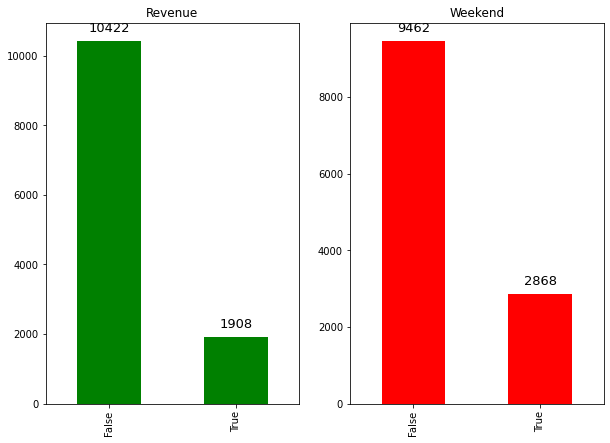

In [13]:
fig, axes = pyt.subplots(1,2, figsize=(10, 7))
ax1 = customerdata['Revenue'].value_counts().plot(kind = 'bar', ax = axes[0], title = 'Revenue',color='green')
ax2 = customerdata['Weekend'].value_counts().plot(kind = 'bar', ax = axes[1], title = 'Weekend',color='red')

append_label_value(ax1)
append_label_value(ax2)

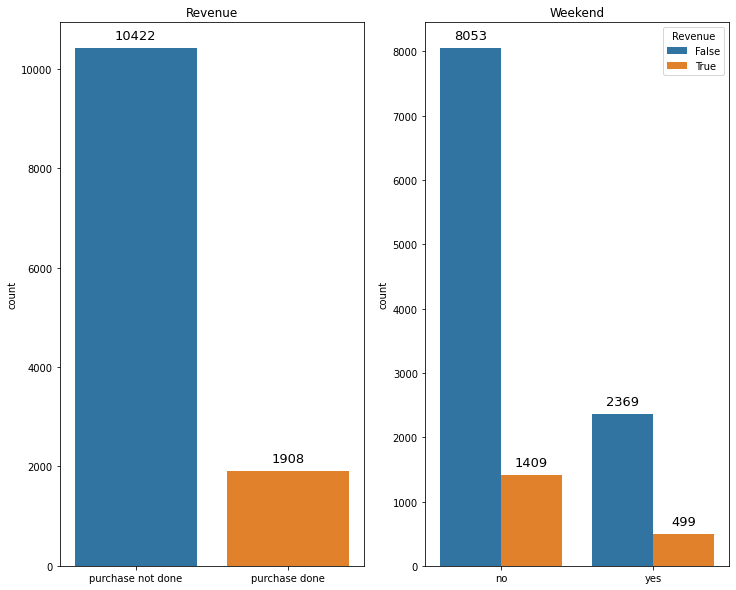

In [14]:
fig, axes = pyt.subplots(1,2, figsize=(12, 10))
ax1 = sb.countplot(x='Revenue', data = customerdata,ax = axes[0])
ax1.set_title("Revenue")
ax1.set_xlabel("")
ax1.set_xticklabels(mark1)
ax2 = sb.countplot(x='Weekend',hue = 'Revenue', data = customerdata, ax = axes[1])
ax2.set_title("Weekend")
ax2.set_xlabel("")
ax2.set_xticklabels(mark2)


append_label_value(ax1)
append_label_value(ax2)

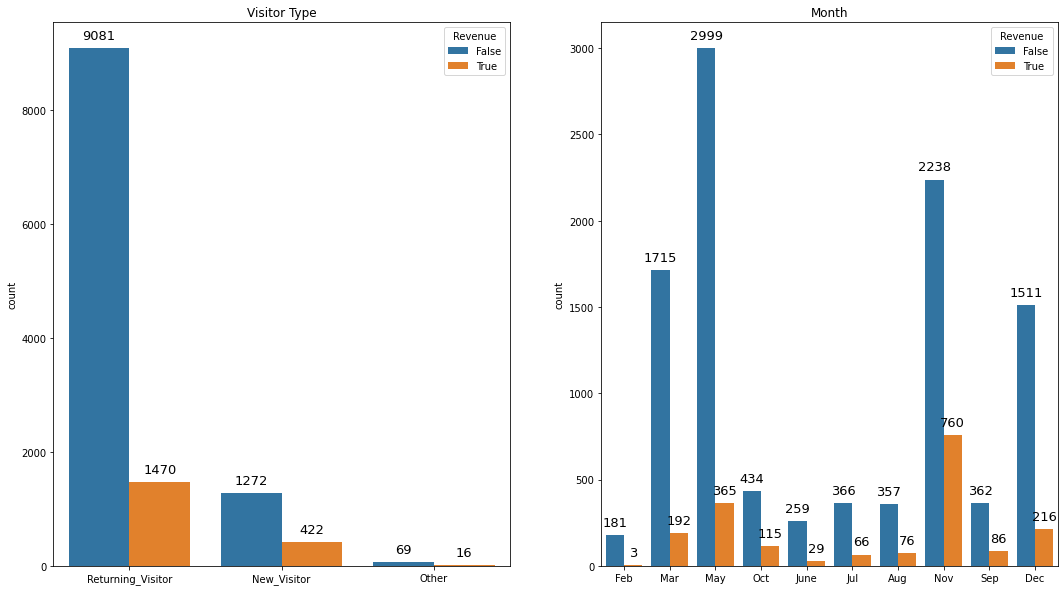

In [15]:
fig, axes = pyt.subplots(1,2, figsize=(18,10))
ax1 = sb.countplot(x='VisitorType', hue='Revenue' ,data = customerdata,ax = axes[0])
ax1.set_title("Visitor Type")
ax1.set_xlabel("")

ax2 = sb.countplot(x='Month',hue='Revenue' , data = customerdata, ax = axes[1], )
ax2.set_title("Month")
ax2.set_xlabel("")


append_label_value(ax1)
append_label_value(ax2)

Text(0.5, 0, '')

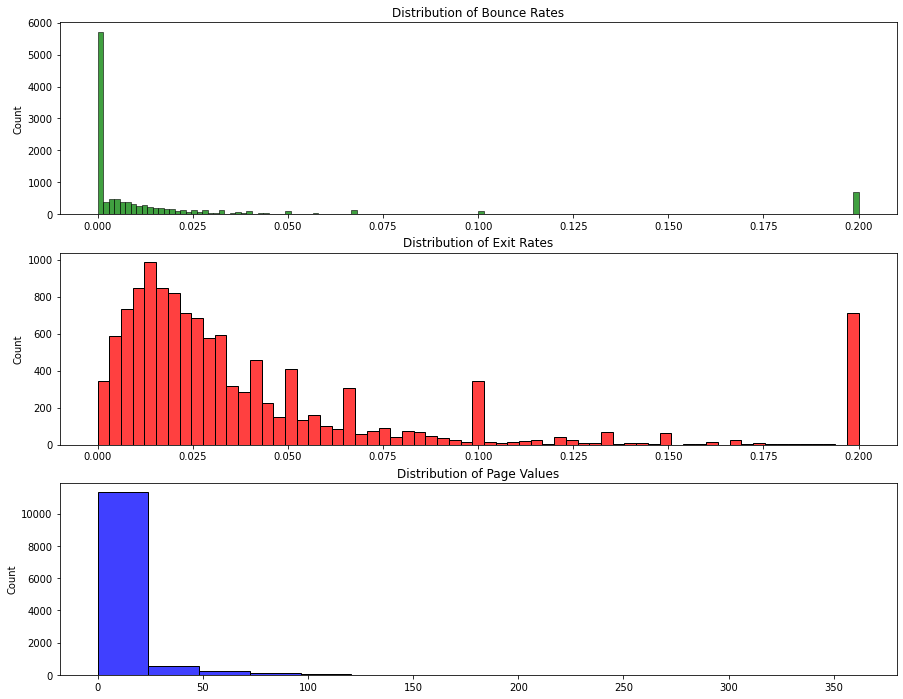

In [16]:
fig, axes = pyt.subplots(3,1, figsize=(15,12))
ax1 = sb.histplot(customerdata["BounceRates"],color="green",ax = axes[0])
ax1.set_title("Distribution of Bounce Rates")
ax1.set_xlabel("")

ax2 = sb.histplot(customerdata["ExitRates"],color="red",ax = axes[1])
ax2.set_title("Distribution of Exit Rates")
ax2.set_xlabel("")

ax3 = sb.histplot(customerdata["PageValues"],color="blue",ax = axes[2])
ax3.set_title("Distribution of Page Values")
ax3.set_xlabel("")

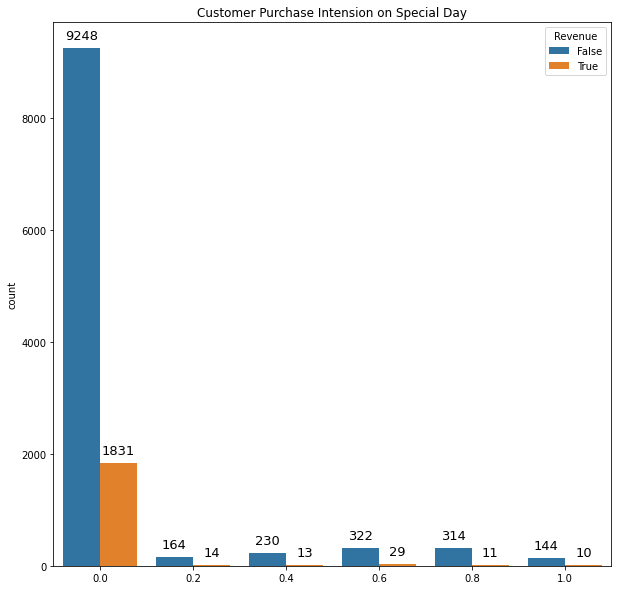

In [17]:
pyt.figure(figsize=(10,10))
ax = sb.countplot(x='SpecialDay',hue='Revenue' ,data=customerdata)
ax.set_title("Customer Purchase Intension on Special Day")
ax.set_xlabel("")
append_label_value(ax)

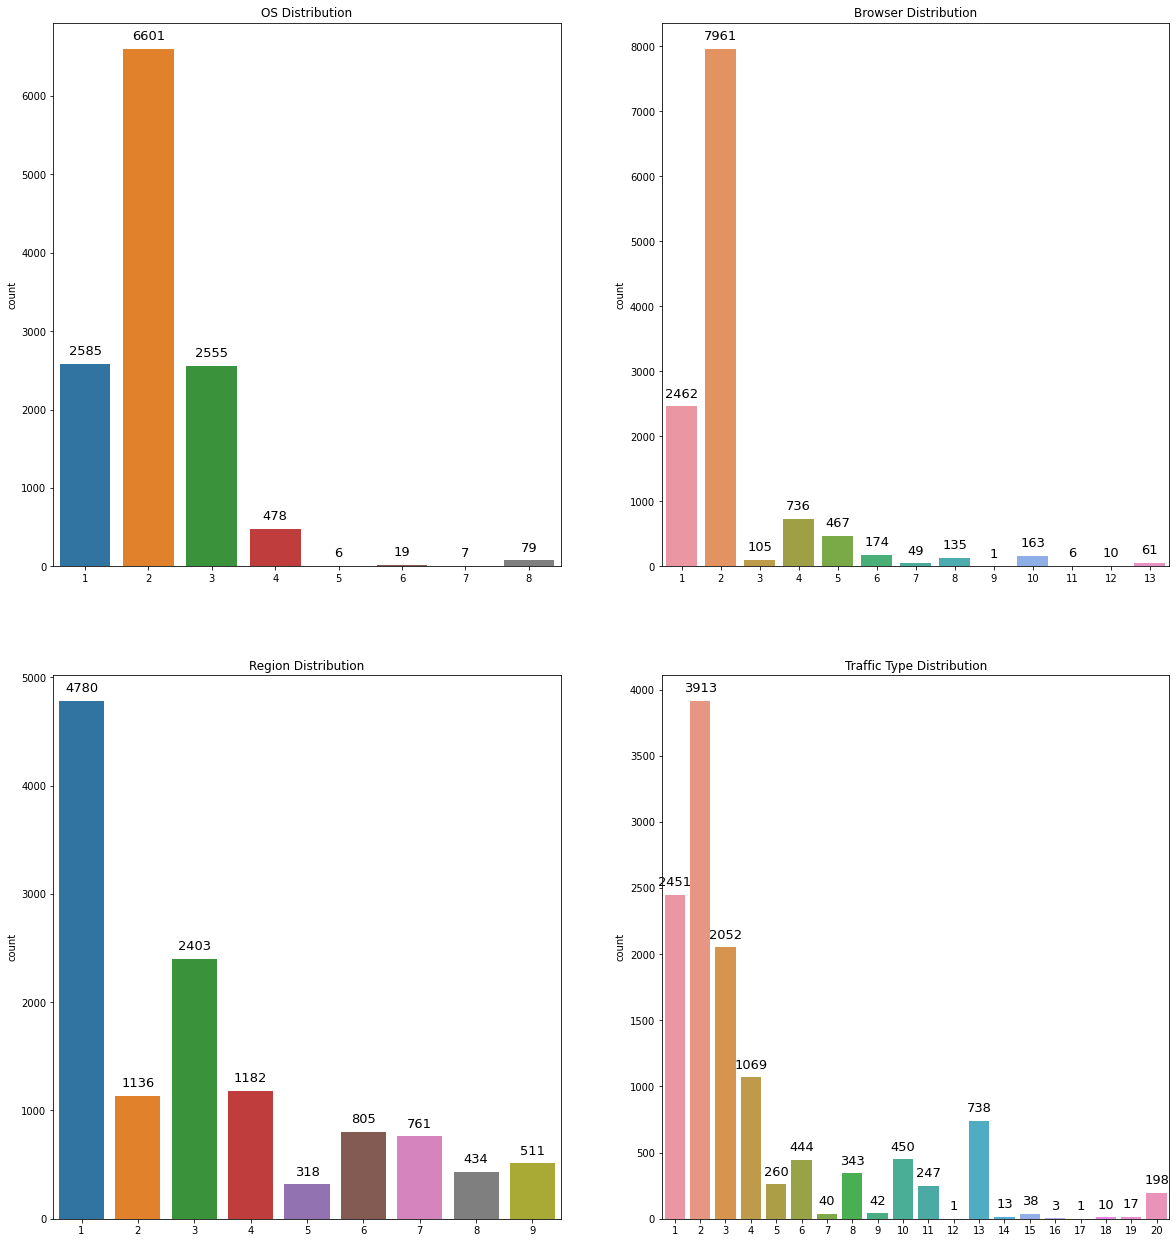

In [18]:
fig, axes = pyt.subplots(2,2, figsize=(20,22))
ax1 = sb.countplot(x= customerdata["OperatingSystems"],data = customerdata,ax = axes[0,0])
ax1.set_title("OS Distribution")
ax1.set_xlabel("")

ax2 = sb.countplot(x= customerdata["Browser"],data = customerdata,ax = axes[0,1])
ax2.set_title("Browser Distribution")
ax2.set_xlabel("")

ax3 = sb.countplot(x= customerdata["Region"],data = customerdata,ax = axes[1,0])
ax3.set_title("Region Distribution")
ax3.set_xlabel("")

ax4 = sb.countplot(x= customerdata["TrafficType"],data = customerdata,ax = axes[1,1])
ax4.set_title("Traffic Type Distribution")
ax4.set_xlabel("")

append_label_value(ax1)
append_label_value(ax2)
append_label_value(ax3)
append_label_value(ax4)

<AxesSubplot:>

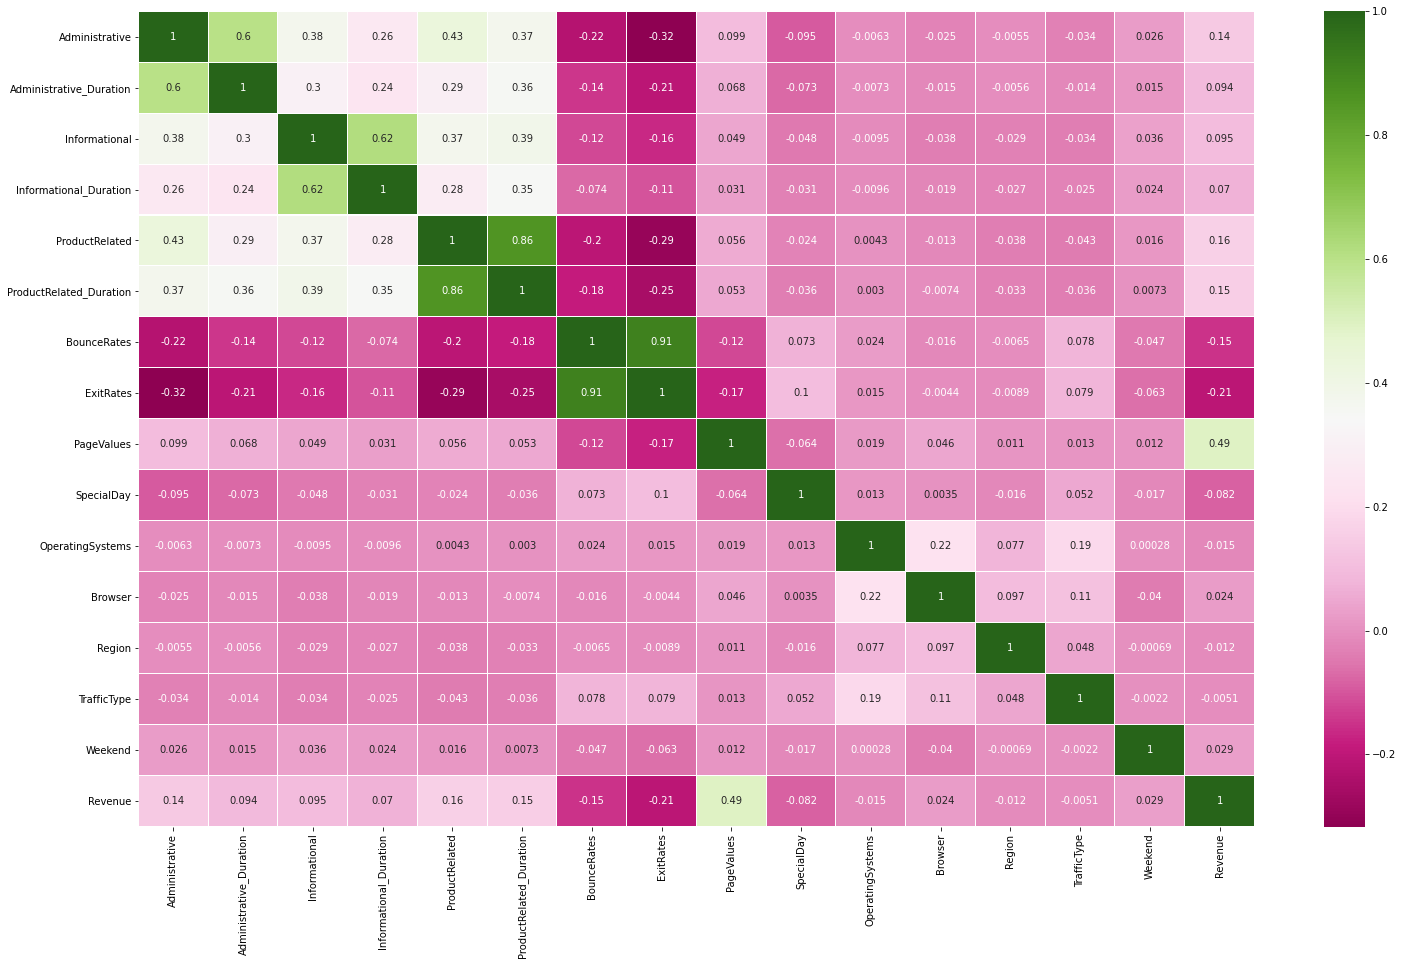

In [19]:
import matplotlib.cm
pyt.figure(figsize=(25,15))
sb.heatmap(customerdata.corr(),annot=True,linewidths=.05,cmap='PiYG')

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

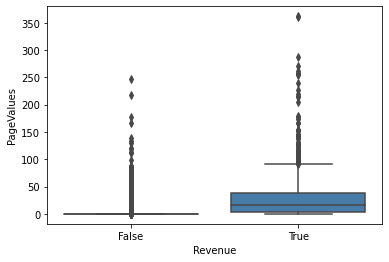

In [20]:
sb.boxplot(x="Revenue", y="PageValues", data=customerdata, palette="Set1")

<AxesSubplot:xlabel='Revenue', ylabel='Informational_Duration'>

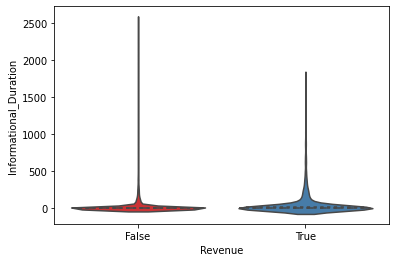

In [21]:
sb.violinplot(x=customerdata['Revenue'], y=customerdata['Informational_Duration'],palette="Set1", split=True,scale="width", inner="quartile")

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

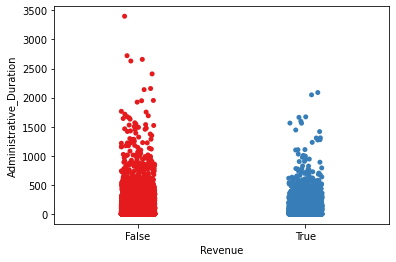

In [22]:
sb.stripplot(x=customerdata['Revenue'], y=customerdata['Administrative_Duration'],palette="Set1", dodge="True")

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated_Duration'>

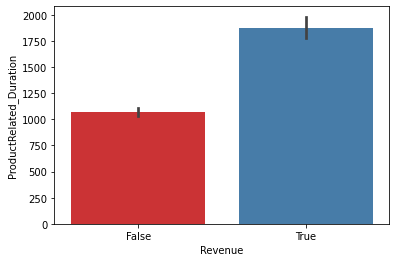

In [23]:
sb.barplot(x=customerdata['Revenue'], y=customerdata['ProductRelated_Duration'],palette="Set1")

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

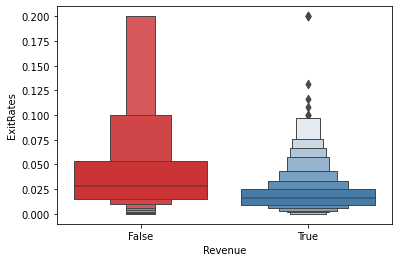

In [24]:
sb.boxenplot(x=customerdata['Revenue'], y=customerdata['ExitRates'],palette="Set1", scale="area")

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

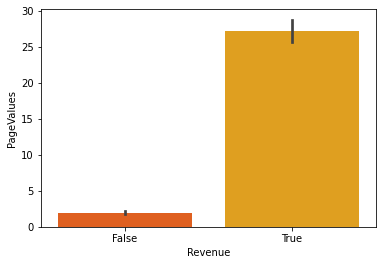

In [25]:
sb.barplot(x=customerdata['Revenue'], y=customerdata['PageValues'], palette = 'autumn')

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

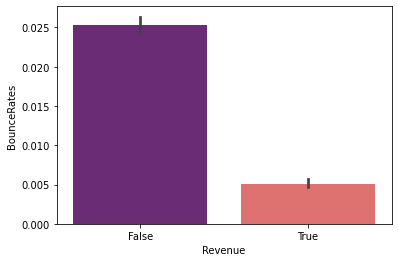

In [26]:
sb.barplot(x=customerdata['Revenue'], y=customerdata['BounceRates'], palette = 'magma')

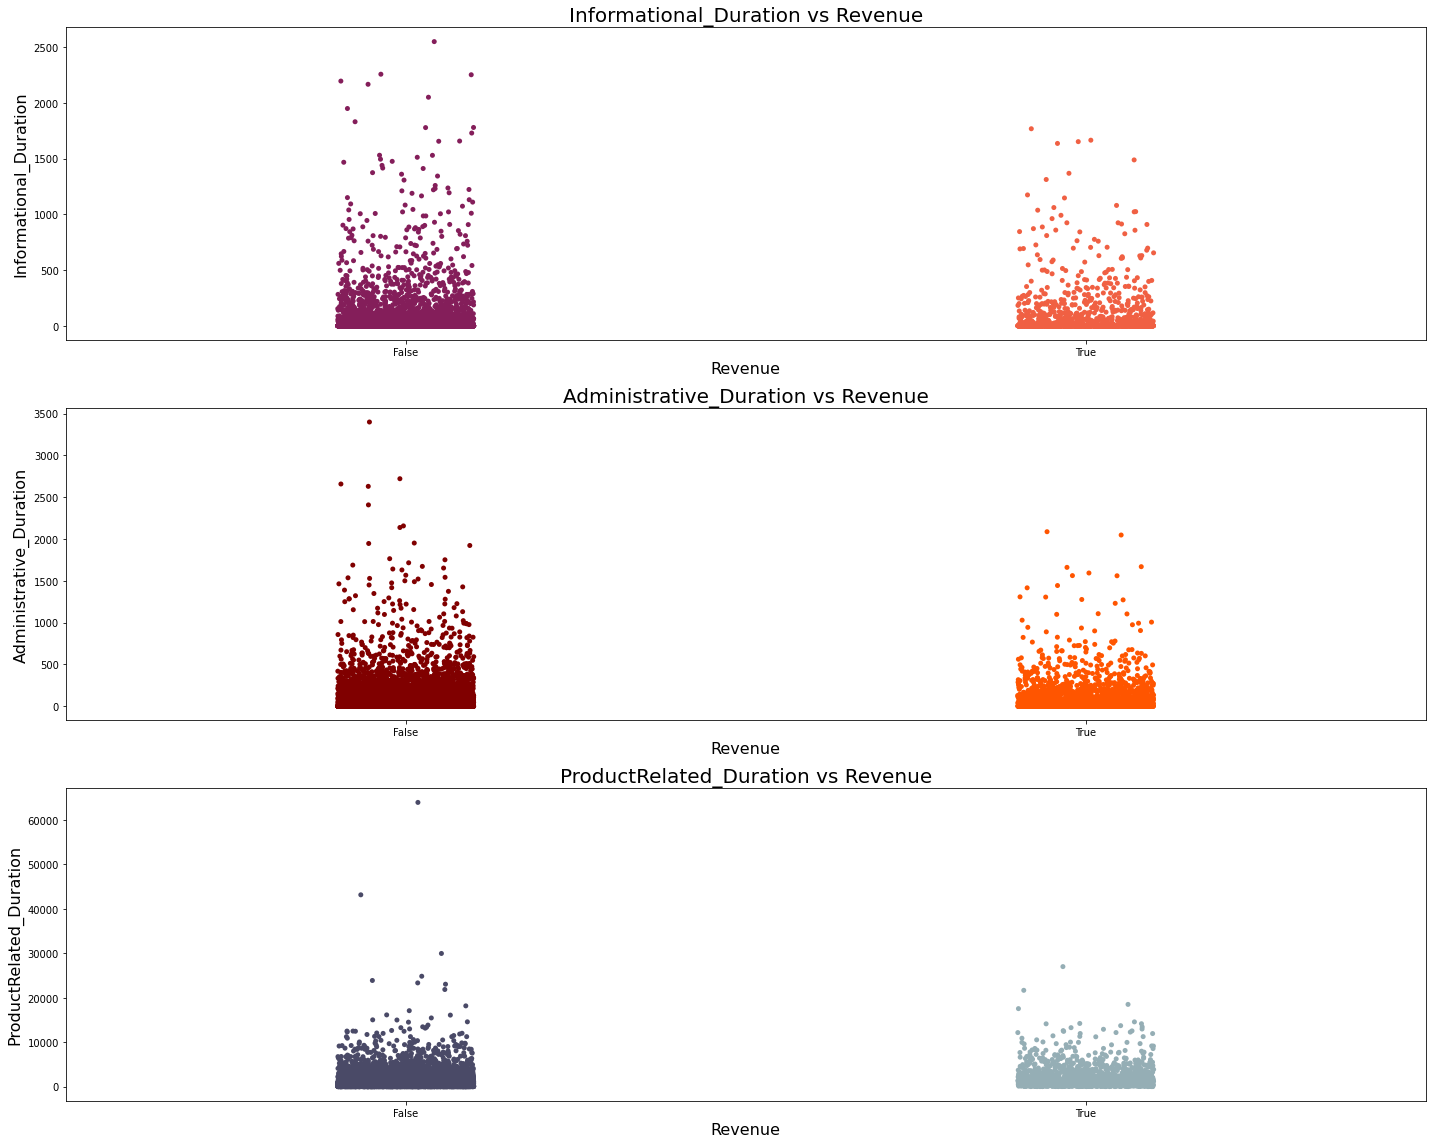

In [27]:
pyt.rcParams['figure.figsize'] = (20, 16)

columns = ['Informational_Duration', 'Administrative_Duration', 'ProductRelated_Duration']
palettes = ['rocket', 'gist_heat', 'bone']
for index, label in enumerate(columns):
    pyt.subplot(3, 1, index+1)
    sb.stripplot(x=customerdata['Revenue'], y=customerdata[label], palette = palettes[index])
    title = label + ' vs Revenue' 
    pyt.title(title, fontsize = 20)
    pyt.ylabel(label, fontsize = 16)
    pyt.xlabel('Revenue', fontsize = 16)
    pyt.tight_layout()

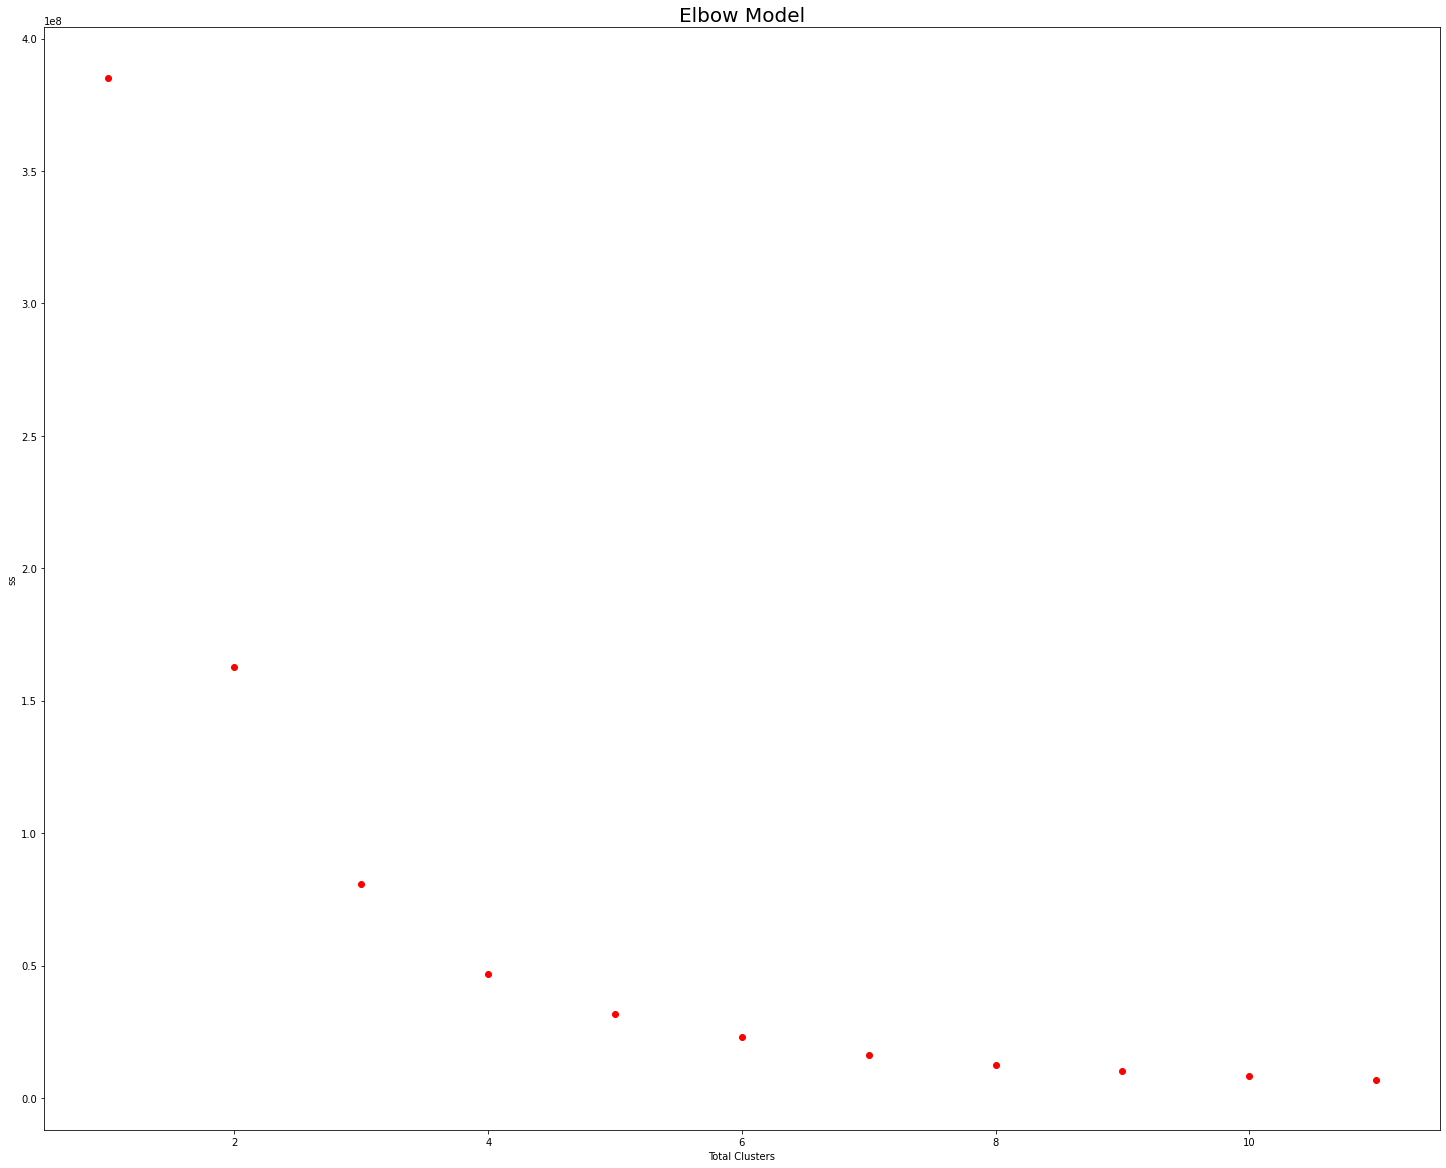

In [28]:
x = customerdata.iloc[:, [1, 6]].values

x.shape


from sklearn.cluster import KMeans

ss = []
for j in range(1, 12):
    K_1 = KMeans(n_clusters = j,
              init = 'random',
              max_iter = 1000,
              n_init = 10,
              random_state = 42,
              algorithm = 'full',
              tol = 0.001)
    K_1.fit(x)
    labels = K_1.labels_
    ss.append(K_1.inertia_)
    
pyt.scatter(range(1, 12), ss, color='r')
pyt.tight_layout()
pyt.title('Elbow Model', fontsize = 20)
pyt.xlabel('Total Clusters')
pyt.ylabel('ss')
pyt.show()

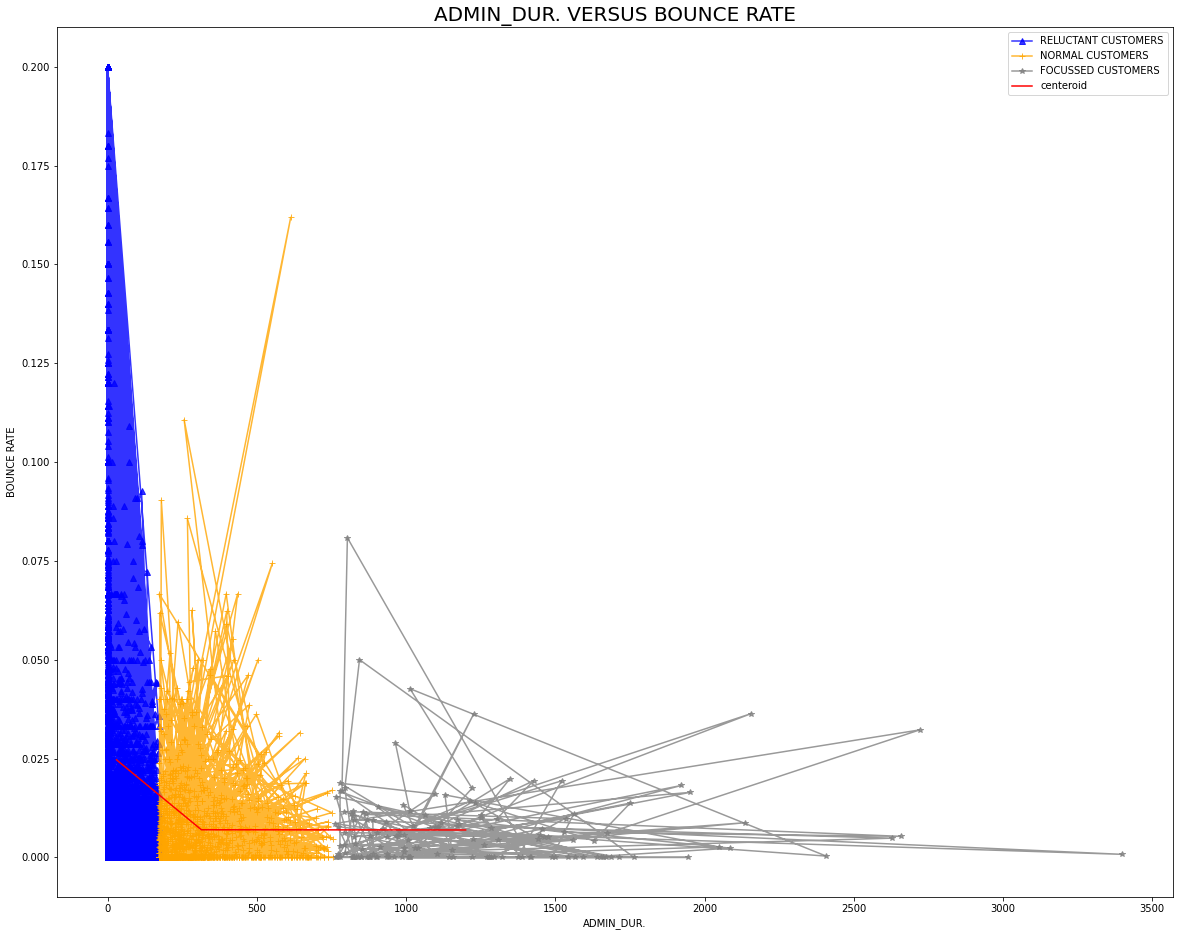

In [29]:
K_1 = KMeans(n_clusters = 3, init = 'random', max_iter = 1000, n_init = 10, random_state = 42)
y_means = K_1.fit_predict(x)

pyt.plot(x[y_means == 0, 0], x[y_means == 0, 1],  c = 'blue', label = 'RELUCTANT CUSTOMERS',marker='^',alpha = 0.8)
pyt.plot(x[y_means == 1, 0], x[y_means == 1, 1],  c = 'orange', label = 'NORMAL CUSTOMERS',marker='+',alpha = 0.8)
pyt.plot(x[y_means == 2, 0], x[y_means == 2, 1],  c = 'grey', label = 'FOCUSSED CUSTOMERS',marker='*',alpha = 0.8)
pyt.plot(K_1.cluster_centers_[:,0], K_1.cluster_centers_[:, 1],  c = 'red' , label = 'centeroid')

pyt.title('ADMIN_DUR. VERSUS BOUNCE RATE', fontsize = 20)
pyt.xlabel('ADMIN_DUR.')
pyt.ylabel('BOUNCE RATE')
pyt.legend()
pyt.show()

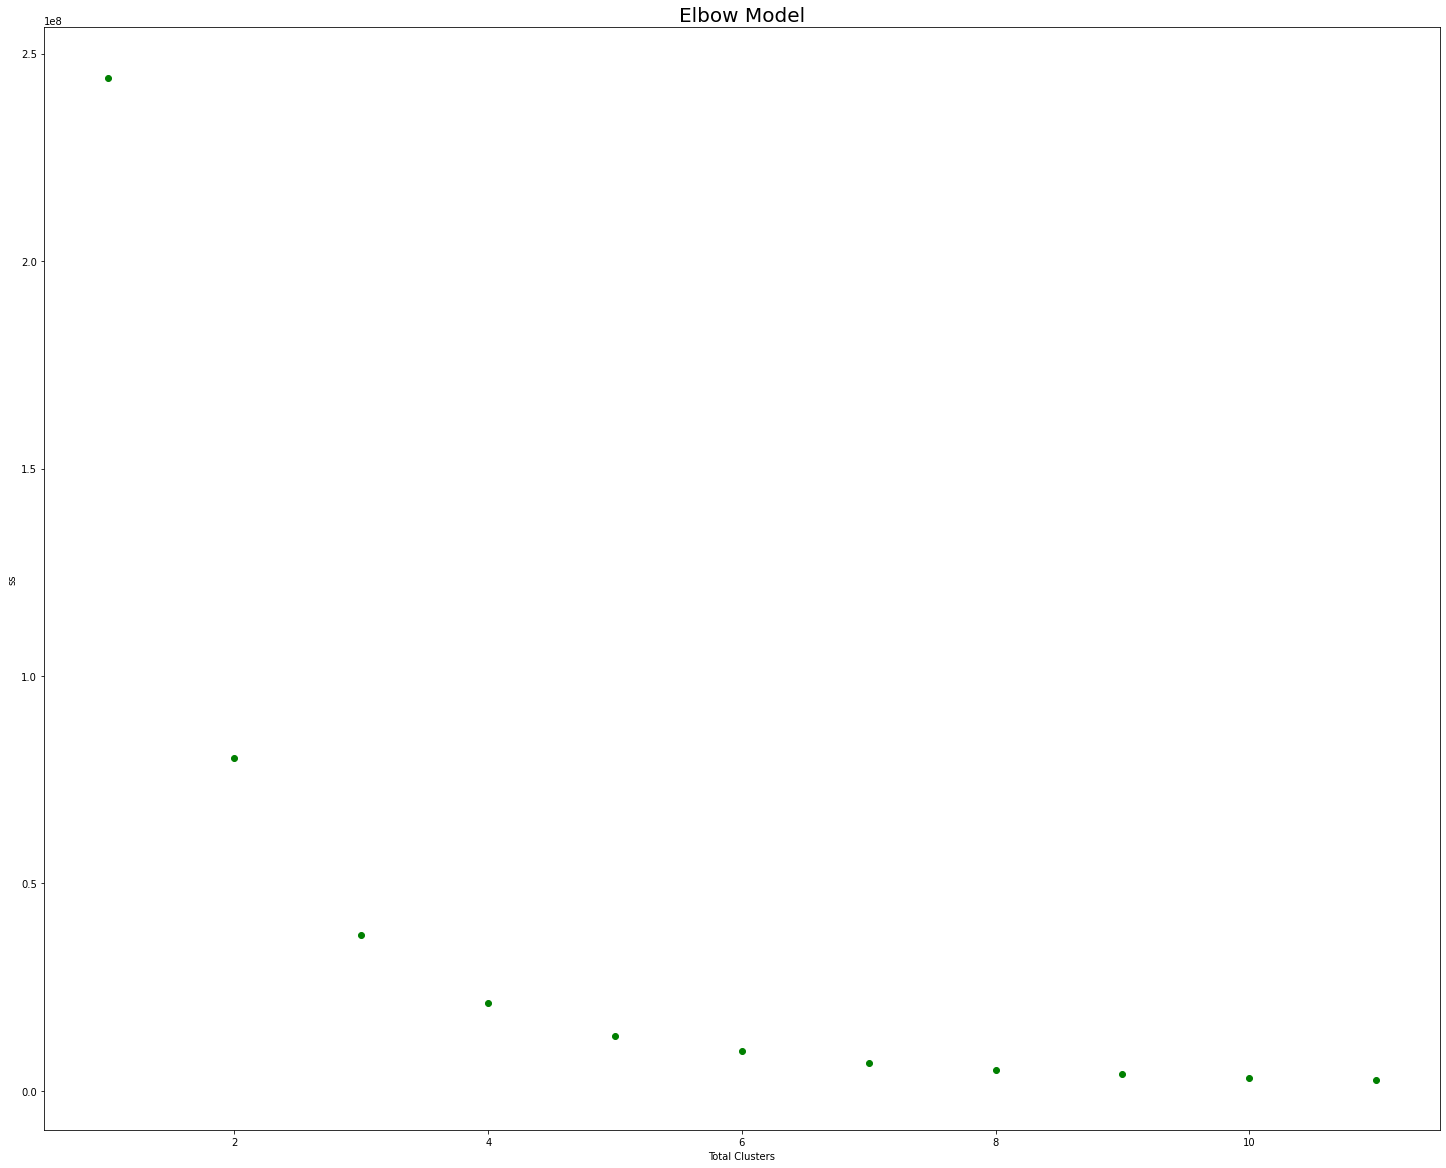

In [30]:
x = customerdata.iloc[:, [3, 6]].values

ss = []
for j in range(1, 12):
    K_1 = KMeans(n_clusters = j,
              init = 'random',
              max_iter = 1000,
              n_init = 10,
              random_state = 42,
              algorithm = 'full',
              tol = 0.001)
    K_1.fit(x)
    labels = K_1.labels_
    ss.append(K_1.inertia_)
    
pyt.scatter(range(1, 12), ss, color='g')
pyt.tight_layout()
pyt.title('Elbow Model', fontsize = 20)
pyt.xlabel('Total Clusters')
pyt.ylabel('ss')
pyt.show()

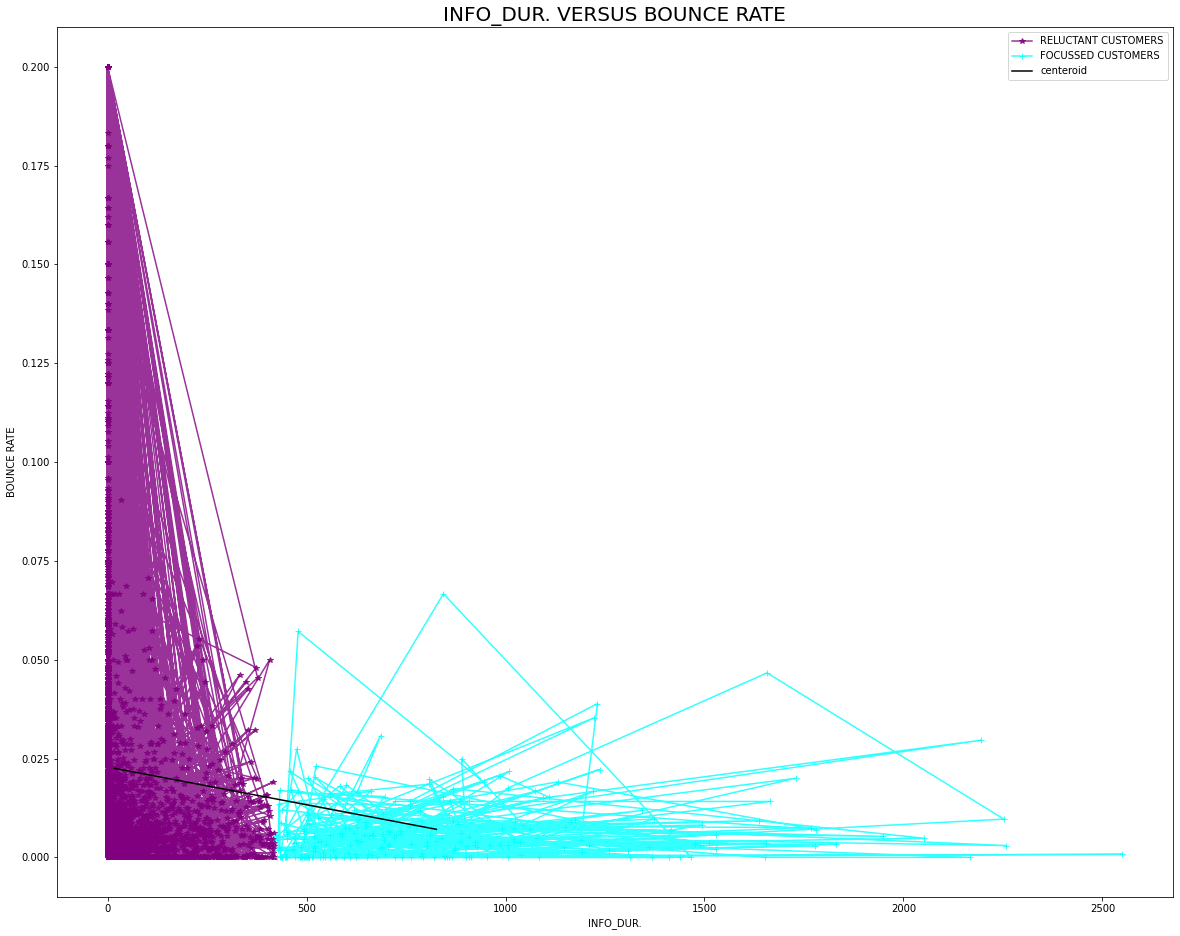

In [31]:
K_1 = KMeans(n_clusters = 2, init = 'random', max_iter = 1000, n_init = 10, random_state = 42)
y_means = K_1.fit_predict(x)

pyt.plot(x[y_means == 0, 0], x[y_means == 0, 1],  c = 'purple', label = 'RELUCTANT CUSTOMERS',marker='*',alpha = 0.8)
pyt.plot(x[y_means == 1, 0], x[y_means == 1, 1],  c = 'cyan', label = 'FOCUSSED CUSTOMERS',marker='+',alpha = 0.8)
pyt.plot(K_1.cluster_centers_[:,0], K_1.cluster_centers_[:, 1],  c = 'black' , label = 'centeroid')

pyt.title('INFO_DUR. VERSUS BOUNCE RATE', fontsize = 20)
pyt.xlabel('INFO_DUR.')
pyt.ylabel('BOUNCE RATE')
pyt.legend()
pyt.show()

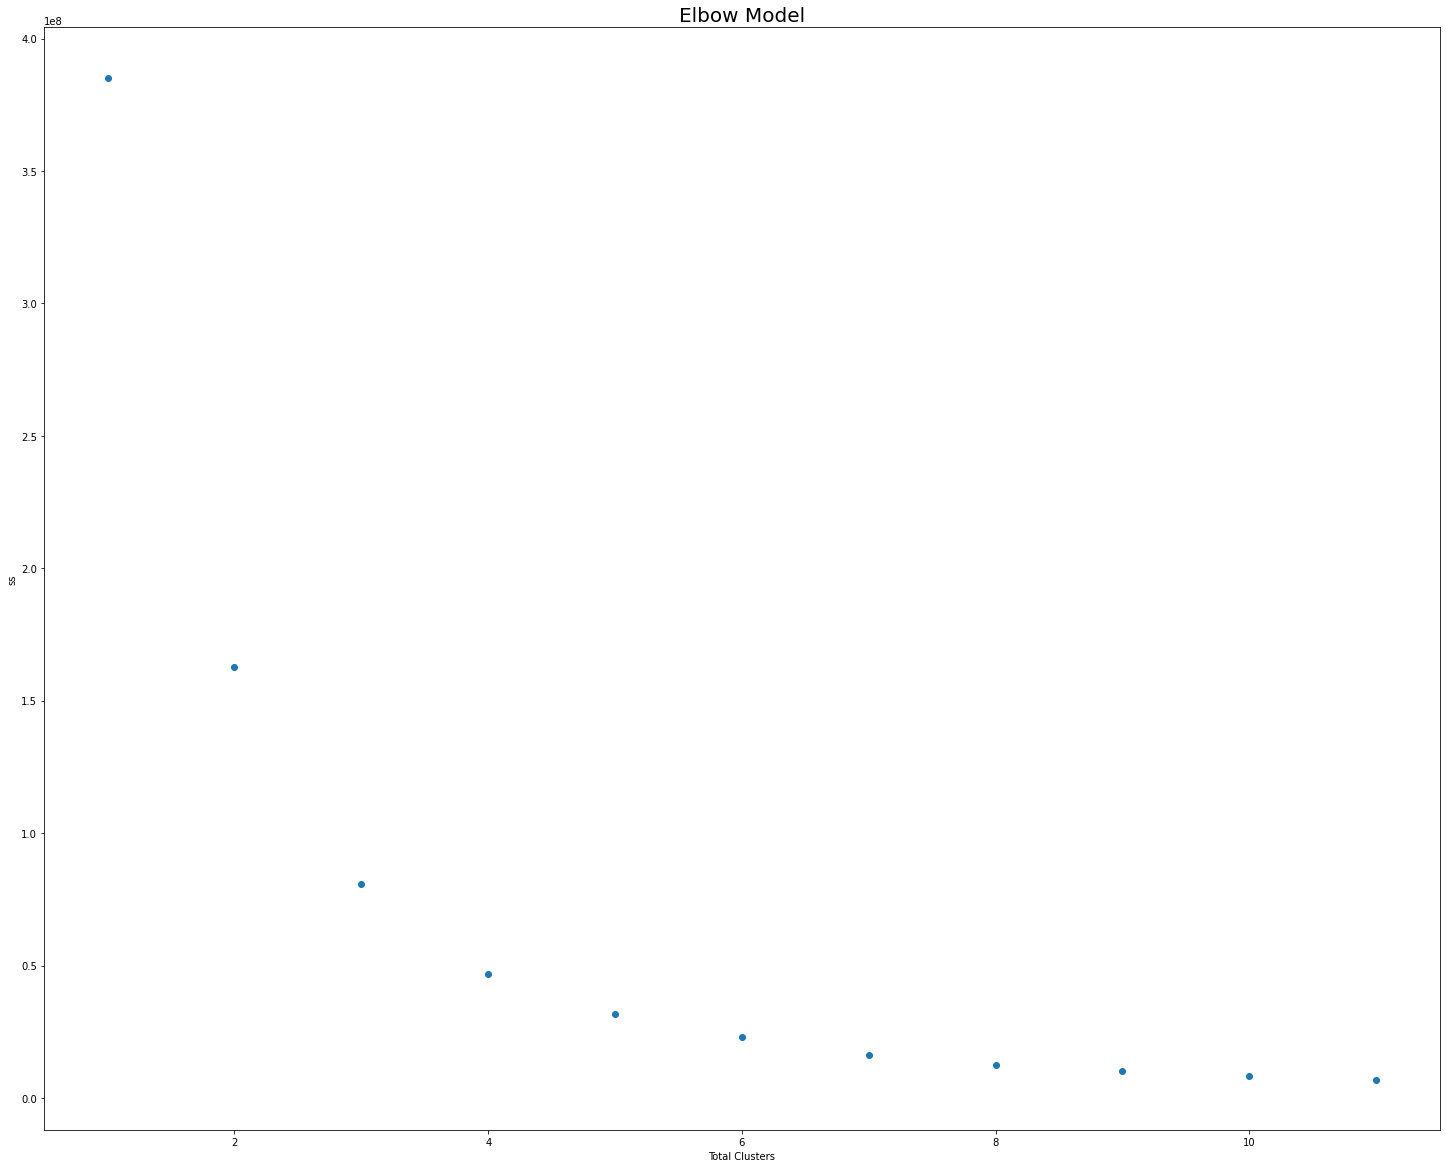

In [32]:
x = customerdata.iloc[:, [1, 7]].values

ss = []
for j in range(1, 12):
    K_1 = KMeans(n_clusters = j,
              init = 'random',
              max_iter = 1000,
              n_init = 10,
              random_state = 42,
              algorithm = 'full',
              tol = 0.001)
    K_1.fit(x)
    labels = K_1.labels_
    ss.append(K_1.inertia_)
    
pyt.scatter(range(1, 12), ss)
pyt.tight_layout()
pyt.title('Elbow Model', fontsize = 20)
pyt.xlabel('Total Clusters')
pyt.ylabel('ss')
pyt.show()

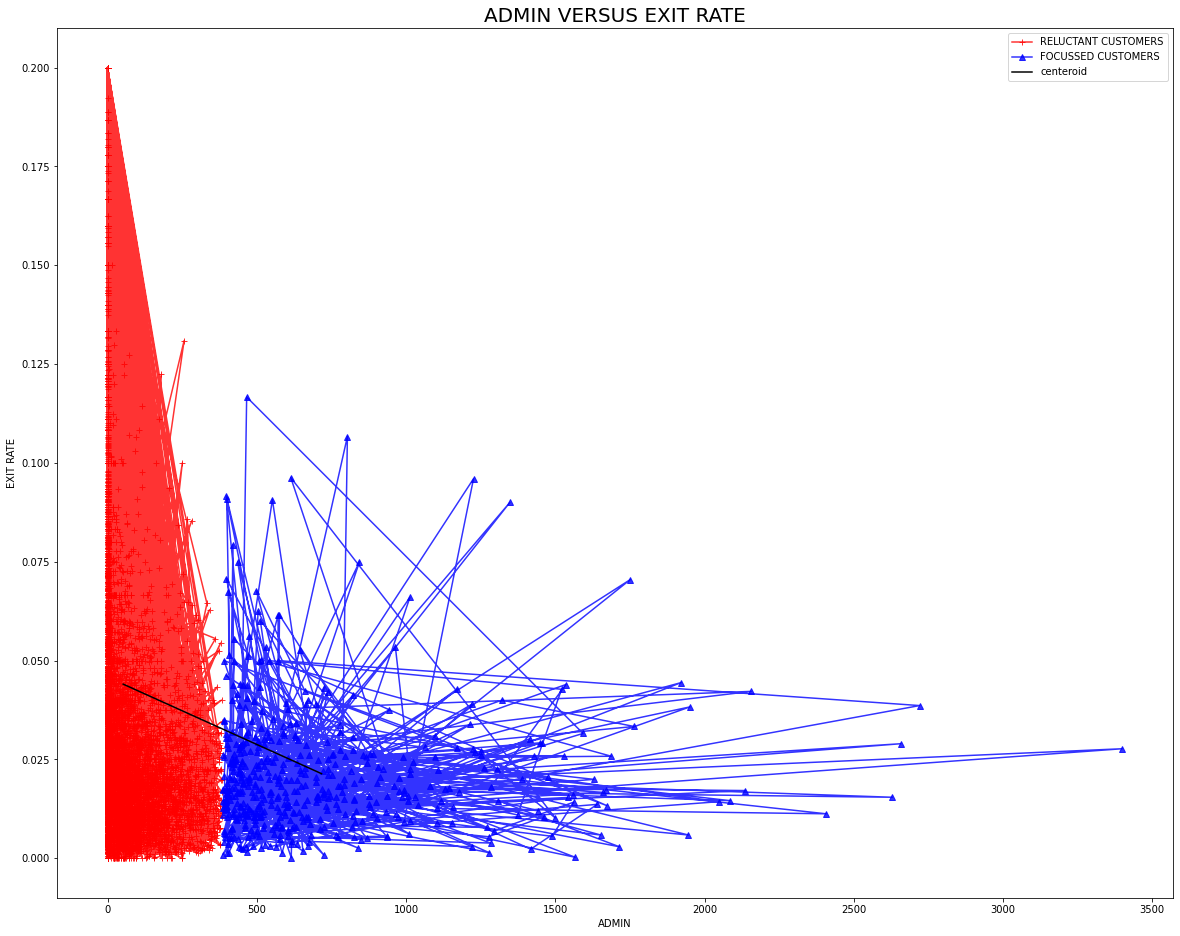

In [33]:
K_1 = KMeans(n_clusters = 2, init = 'random', max_iter = 1000, n_init = 10, random_state = 42)
y_means = K_1.fit_predict(x)

pyt.plot(x[y_means == 0, 0], x[y_means == 0, 1],  c = 'red', label = 'RELUCTANT CUSTOMERS',marker='+',alpha = 0.8)
pyt.plot(x[y_means == 1, 0], x[y_means == 1, 1],  c = 'blue', label = 'FOCUSSED CUSTOMERS',marker='^',alpha = 0.8)
pyt.plot(K_1.cluster_centers_[:,0], K_1.cluster_centers_[:, 1],  c = 'black' , label = 'centeroid')

pyt.title('ADMIN VERSUS EXIT RATE', fontsize = 20)
pyt.xlabel('ADMIN')
pyt.ylabel('EXIT RATE')
pyt.legend()
pyt.show()

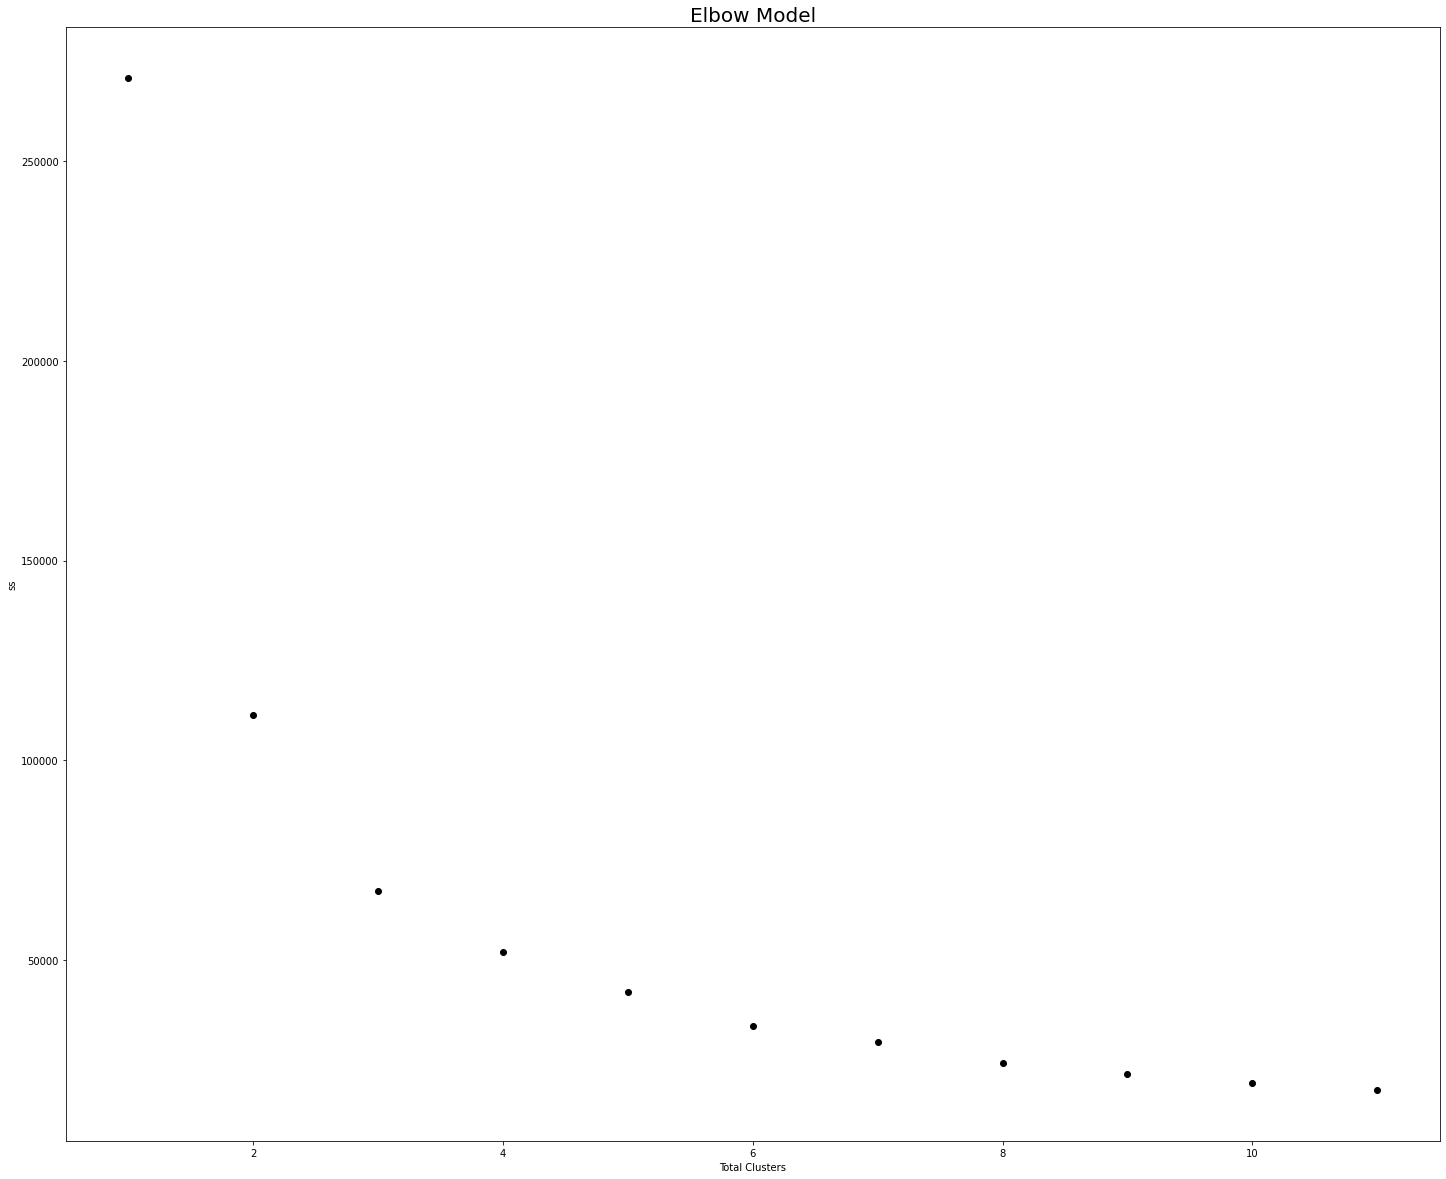

In [34]:
x = customerdata.iloc[:, [13, 14]].values

ss = []
for j in range(1, 12):
    K_1 = KMeans(n_clusters = j,
              init = 'random',
              max_iter = 1000,
              n_init = 10,
              random_state = 42,
              algorithm = 'full',
              tol = 0.001)
    K_1.fit(x)
    labels = K_1.labels_
    ss.append(K_1.inertia_)
    
pyt.scatter(range(1, 12), ss, color = 'k')
pyt.tight_layout()
pyt.title('Elbow Model', fontsize = 20)
pyt.xlabel('Total Clusters')
pyt.ylabel('ss')
pyt.show()

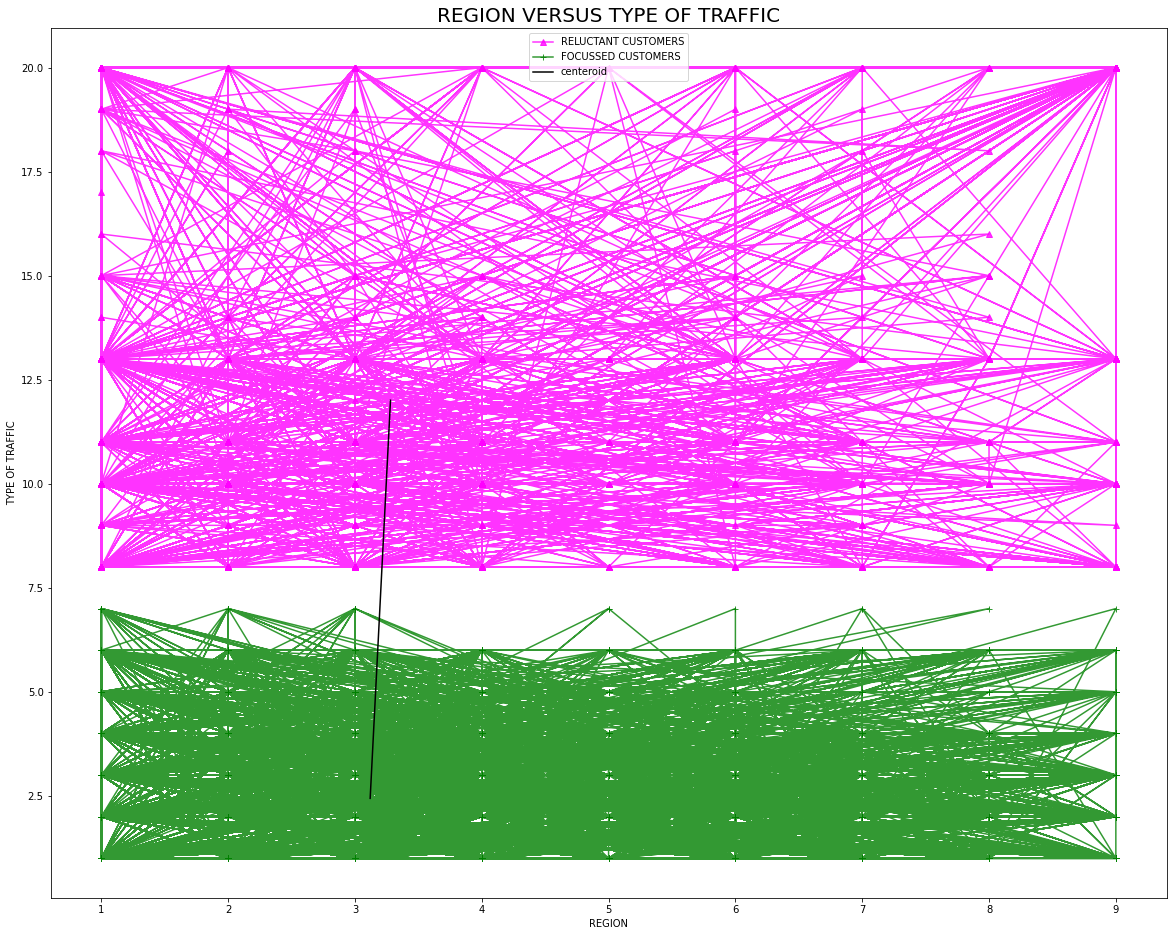

In [35]:
K_1 = KMeans(n_clusters = 2, init = 'random', max_iter = 1000, n_init = 10, random_state = 42)
y_means = K_1.fit_predict(x)

pyt.plot(x[y_means == 0, 0], x[y_means == 0, 1],  c = 'magenta', label = 'RELUCTANT CUSTOMERS',marker='^',alpha = 0.8)
pyt.plot(x[y_means == 1, 0], x[y_means == 1, 1],  c = 'green', label = 'FOCUSSED CUSTOMERS',marker='+',alpha = 0.8)
pyt.plot(K_1.cluster_centers_[:,0], K_1.cluster_centers_[:, 1],  c = 'black' , label = 'centeroid')

pyt.title('REGION VERSUS TYPE OF TRAFFIC', fontsize = 20)
pyt.xlabel('REGION')
pyt.ylabel('TYPE OF TRAFFIC')
pyt.legend()
pyt.show()

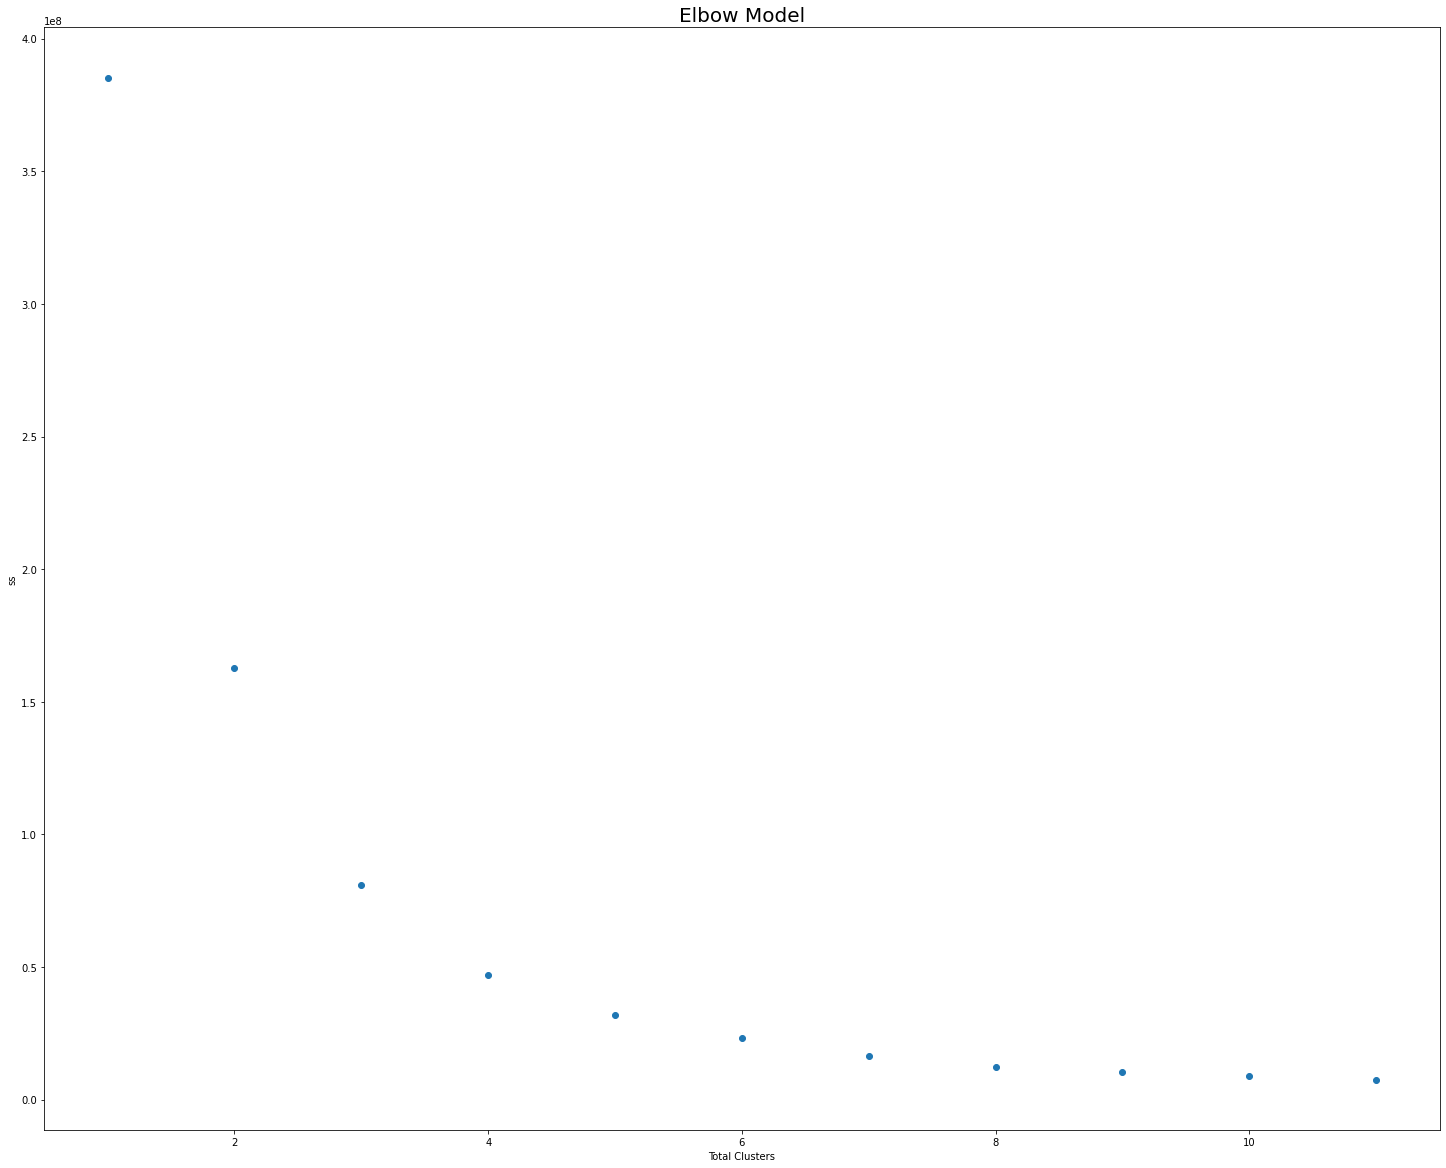

In [36]:
x = customerdata.iloc[:, [1, 13]].values

ss = []
for j in range(1, 12):
    K_1 = KMeans(n_clusters = j,
              init = 'random',
              max_iter = 1000,
              n_init = 10,
              random_state = 42,
              algorithm = 'full',
              tol = 0.001)
    K_1.fit(x)
    labels = K_1.labels_
    ss.append(K_1.inertia_)
    
pyt.scatter(range(1, 12), ss)
pyt.tight_layout()
pyt.title('Elbow Model', fontsize = 20)
pyt.xlabel('Total Clusters')
pyt.ylabel('ss')
pyt.show()

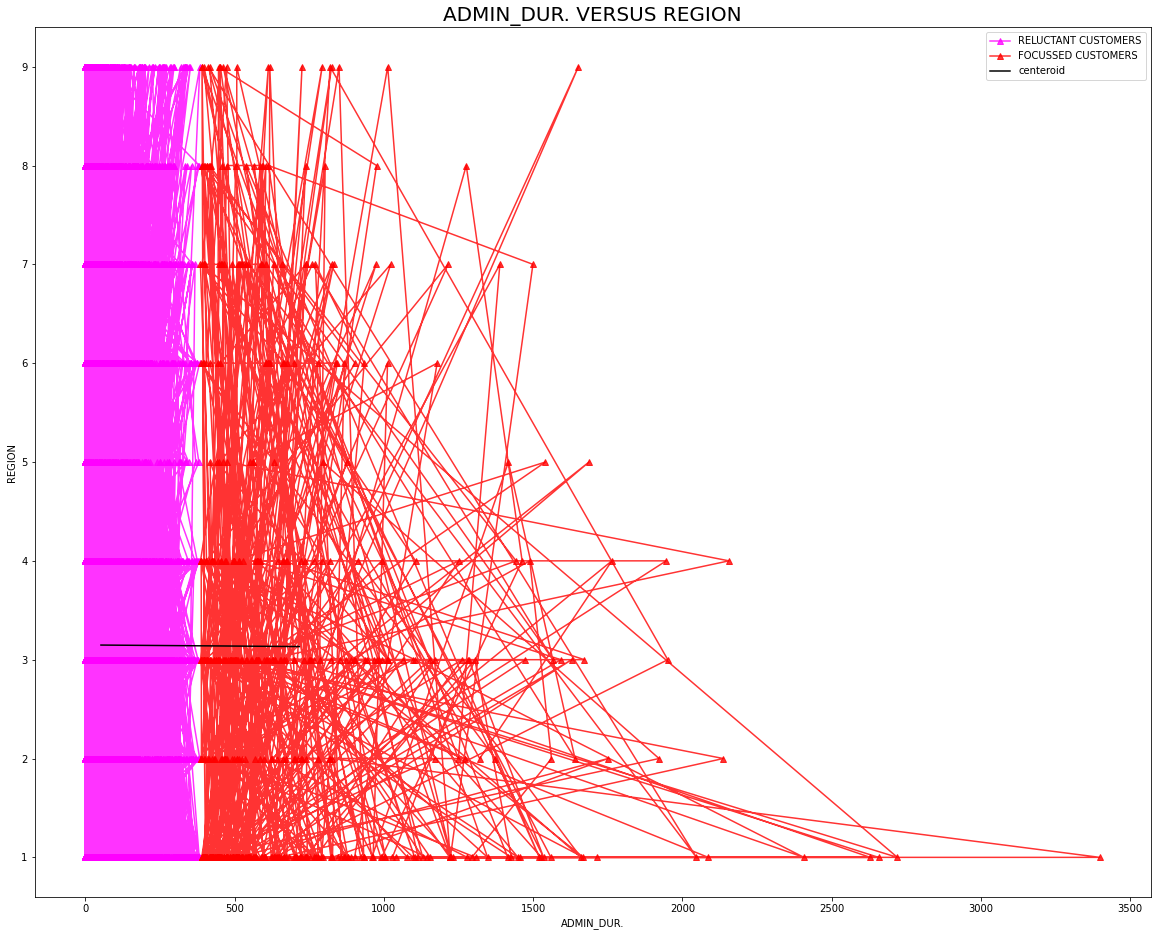

In [37]:
K_1 = KMeans(n_clusters = 2, init = 'random', max_iter = 1000, n_init = 10, random_state = 42)
y_means = K_1.fit_predict(x)

pyt.plot(x[y_means == 0, 0], x[y_means == 0, 1],  c = 'magenta', label = 'RELUCTANT CUSTOMERS',marker='^',alpha = 0.8)
pyt.plot(x[y_means == 1, 0], x[y_means == 1, 1],  c = 'r', label = 'FOCUSSED CUSTOMERS',marker='^',alpha = 0.8)
pyt.plot(K_1.cluster_centers_[:,0], K_1.cluster_centers_[:, 1],  c = 'k' , label = 'centeroid')

pyt.title('ADMIN_DUR. VERSUS REGION', fontsize = 20)
pyt.xlabel('ADMIN_DUR.')
pyt.ylabel('REGION')
pyt.legend()
pyt.show()

In [38]:
customerdata_new = customerdata.drop(['Revenue'], axis=1)

X = pd.get_dummies(customerdata_new,drop_first=True)

X.Weekend = X.Weekend.astype(int)

X.head()

y = customerdata['Revenue']

In [39]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [40]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

SCALAR = StandardScaler()
X = SCALAR.fit_transform(X)

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.20, random_state=42)

def ACCURACY(y_Test,y_Predict):
    from sklearn.metrics import confusion_matrix
    RESULT_MATRIX = confusion_matrix(y_Predict,y_Test)
    ACCURACY = ((RESULT_MATRIX[0][0]+RESULT_MATRIX[1][1])/(len(y_Test)))*100
    return ACCURACY


 Building Support Vector Machine

 Testing Accuracy of SVM:  87.916


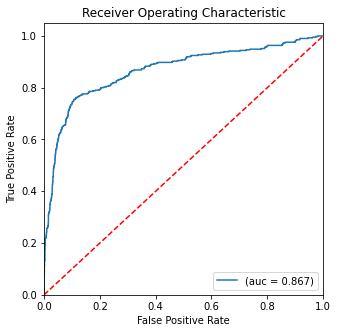

              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2055
        True       0.74      0.43      0.54       411

    accuracy                           0.88      2466
   macro avg       0.82      0.70      0.74      2466
weighted avg       0.87      0.88      0.87      2466



<AxesSubplot:>

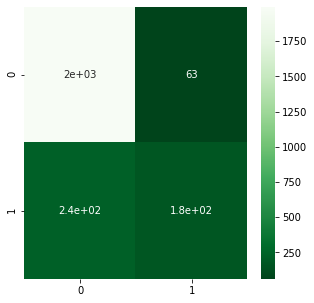

In [42]:
print("\n Building Support Vector Machine")
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
SVC_Model = SVC(probability=True)
ML_Method = SVC_Model.fit(X_Train,y_Train)
y_Predict_SVC_Model = ML_Method.predict(X_Test)
print("\n Testing Accuracy of SVM: ",round(ACCURACY(y_Test,y_Predict_SVC_Model),3))

ROC_Model=roc_auc_score(y_Test, ML_Method.predict_proba(X_Test)[:,1])
C_Report=classification_report(y_Test, y_Predict_SVC_Model)


probs = ML_Method.predict_proba(X_Test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_Test, preds)

pyt.rcParams['figure.figsize'] = (5, 5)
pyt.figure()
pyt.plot(fpr, tpr, label='(auc = %0.3f)' % ROC_Model)
pyt.plot([0, 1], [0, 1],'r--')
pyt.xlim([0.0, 1.0])
pyt.ylim([0.0, 1.05])
pyt.xlabel('False Positive Rate')
pyt.ylabel('True Positive Rate')
pyt.title('Receiver Operating Characteristic')
pyt.legend(loc="lower right")
pyt.show()

print(C_Report)

Result_Confusion_Matrix = confusion_matrix(y_Test, y_Predict_SVC_Model)
sb.heatmap(Result_Confusion_Matrix ,annot = True, cmap="Greens_r")


 Testing of Random Forest:  89.213


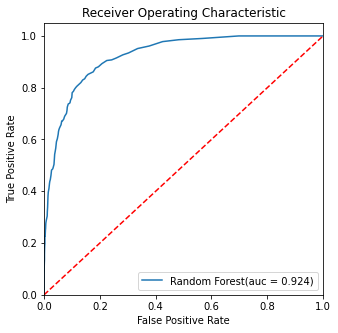

              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2055
        True       0.74      0.54      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.89      2466



<AxesSubplot:>

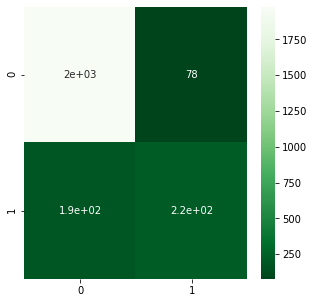

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
MODEL_RF = RandomForestClassifier()
MODEL_RF = MODEL_RF.fit(X_Train,y_Train)
y_Predict_RFModel = MODEL_RF.predict(X_Test)

print("\n Testing of Random Forest: ",round(ACCURACY(y_Test,y_Predict_RFModel),3))

ROC_Model=roc_auc_score(y_Test, MODEL_RF.predict_proba(X_Test)[:,1])
C_Report=classification_report(y_Test, y_Predict_RFModel )


probs = MODEL_RF.predict_proba(X_Test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_Test, preds)

pyt.rcParams['figure.figsize'] = (5, 5)
pyt.figure()
pyt.plot(fpr, tpr, label='Random Forest(auc = %0.3f)' % ROC_Model)
pyt.plot([0, 1], [0, 1],'r--')
pyt.xlim([0.0, 1.0])
pyt.ylim([0.0, 1.05])
pyt.xlabel('False Positive Rate')
pyt.ylabel('True Positive Rate')
pyt.title('Receiver Operating Characteristic')
pyt.legend(loc="lower right")
pyt.show()

print(C_Report)

Result_Confusion_Matrix = confusion_matrix(y_Test, y_Predict_RFModel)
sb.heatmap(Result_Confusion_Matrix ,annot = True, cmap="Greens_r")

In [44]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense


model_nn = Sequential()
model_nn.add(Dense(units = 128, activation = 'relu', input_dim = 26))
model_nn.add(Dropout(0.25))
model_nn.add(Dense(units = 128, activation = 'relu'))
model_nn.add(Dropout(0.25))
model_nn.add(Dense(units = 128, activation = 'relu'))
model_nn.add(Dropout(0.25))
model_nn.add(Dense(units = 1, activation = 'sigmoid'))
model_nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_nn.fit(X_Train, y_Train, batch_size = 20, epochs = 100, verbose=False)


 Testing Accuracy of Neural Network:  87.632


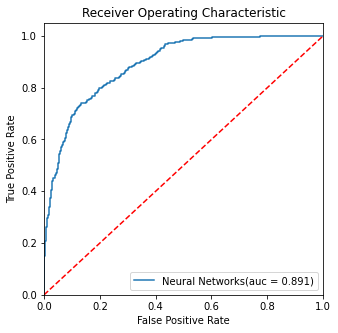

              precision    recall  f1-score   support

       False       0.91      0.95      0.93      2055
        True       0.66      0.52      0.59       411

    accuracy                           0.88      2466
   macro avg       0.79      0.74      0.76      2466
weighted avg       0.87      0.88      0.87      2466



<AxesSubplot:>

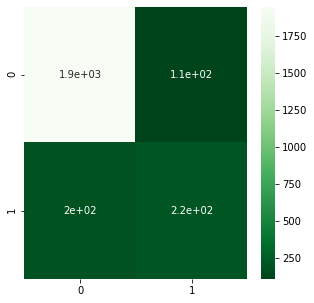

In [45]:
from sklearn.metrics import confusion_matrix
y_Predict_NueralNet = model_nn.predict_classes(X_Test)
print("\n Testing Accuracy of Neural Network: ",round(ACCURACY(y_Test,y_Predict_NueralNet),3))

ROC_Model=roc_auc_score(y_Test, model_nn.predict_proba(X_Test)[:,0])
C_Report=classification_report(y_Test, y_Predict_NueralNet)


probs = model_nn.predict_proba(X_Test)
preds = probs[:,0]
fpr, tpr, threshold = roc_curve(y_Test, preds)

pyt.rcParams['figure.figsize'] = (5, 5)
pyt.figure()
pyt.plot(fpr, tpr, label='Neural Networks(auc = %0.3f)' % ROC_Model)
pyt.plot([0, 1], [0, 1],'r--')
pyt.xlim([0.0, 1.0])
pyt.ylim([0.0, 1.05])
pyt.xlabel('False Positive Rate')
pyt.ylabel('True Positive Rate')
pyt.title('Receiver Operating Characteristic')
pyt.legend(loc="lower right")
pyt.show()

print(C_Report)

Result_Confusion_Matrix = confusion_matrix(y_Test, y_Predict_NueralNet)
sb.heatmap(Result_Confusion_Matrix ,annot = True, cmap="Greens_r")

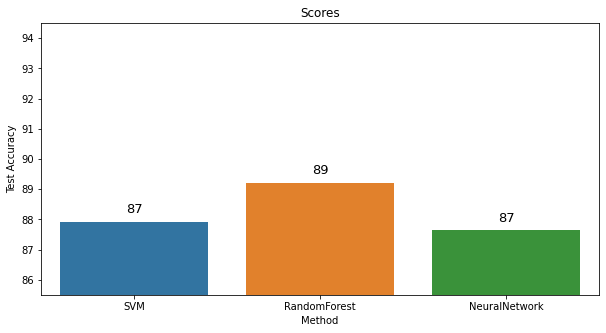

In [46]:
Summary= [['SVM',ACCURACY(y_Test,y_Predict_SVC_Model)],['RandomForest',ACCURACY(y_Test,y_Predict_RFModel)],['NeuralNetwork',ACCURACY(y_Test,y_Predict_NueralNet)]]
Accuracy_Comparision = pd.DataFrame(Summary, columns = ['Method', 'Test Accuracy'])
pyt.figure(figsize=(10,5))
ax = sb.barplot(x=Accuracy_Comparision['Method'],y=Accuracy_Comparision['Test Accuracy'])
ax.set_title('Scores')
ax.set_ylim(90,90)
append_label_value(ax)